<a href="https://colab.research.google.com/github/BhumikaSongara/DSA_Project/blob/main/Copy_of_stockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/your_excel_file.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.xlsx')  # Update the file path accordingly

# Specify the path for the CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.csv'  # Update the file path accordingly

# Convert DataFrame to CSV format and save it
df.to_csv(csv_file_path, index=False)

# Print a message indicating that the conversion is complete
print(f"Excel file '{'/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.xlsx'}' converted to CSV file '{'/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.csv'}' successfully.")


Excel file '/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.xlsx' converted to CSV file '/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.csv' successfully.


(125, 1)


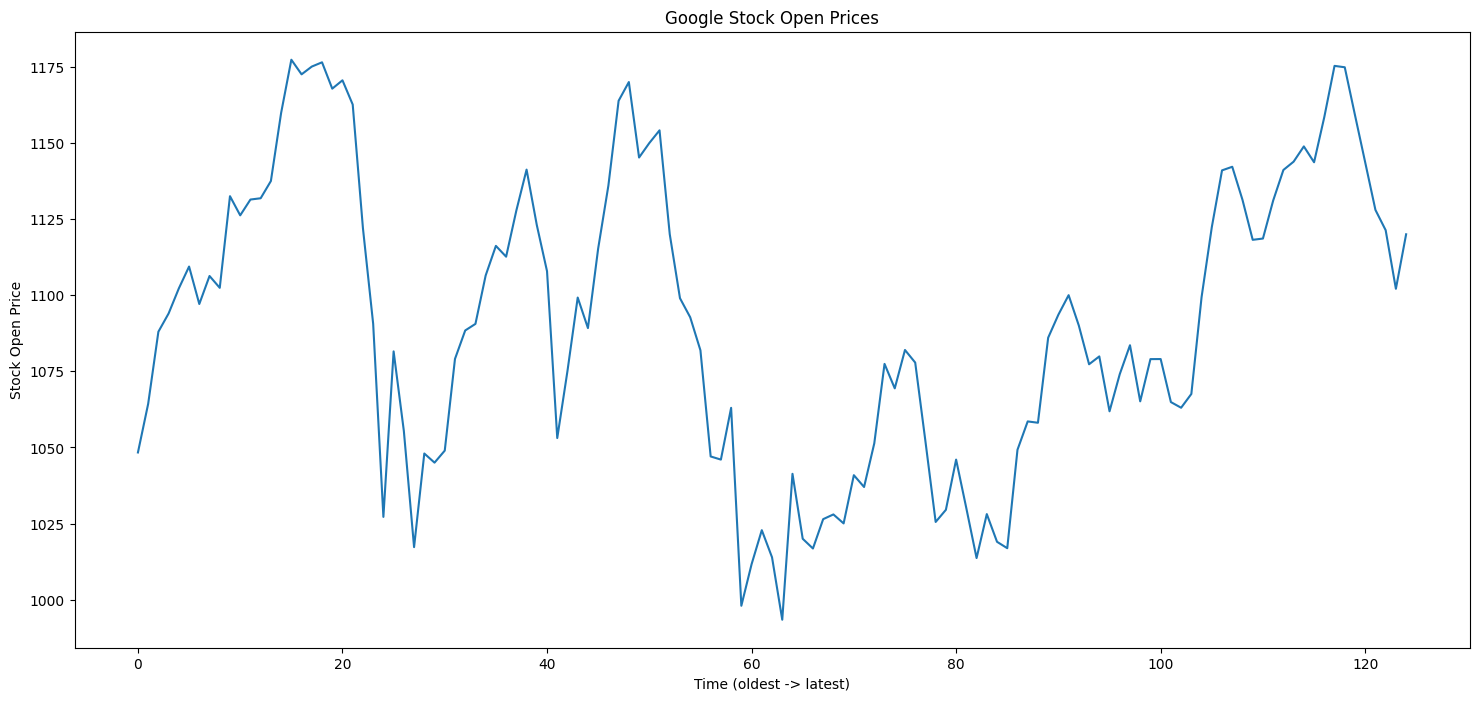

(65, 60, 1)
Epoch 1/100
3/3 [==============================] - 11s 107ms/step - loss: 0.2264
Epoch 2/100
3/3 [==============================] - 0s 97ms/step - loss: 0.0969
Epoch 3/100
3/3 [==============================] - 0s 96ms/step - loss: 0.1697
Epoch 4/100
3/3 [==============================] - 0s 107ms/step - loss: 0.0847
Epoch 5/100
3/3 [==============================] - 0s 97ms/step - loss: 0.0860
Epoch 6/100
3/3 [==============================] - 0s 97ms/step - loss: 0.0995
Epoch 7/100
3/3 [==============================] - 0s 100ms/step - loss: 0.0958
Epoch 8/100
3/3 [==============================] - 0s 101ms/step - loss: 0.0804
Epoch 9/100
3/3 [==============================] - 0s 100ms/step - loss: 0.0643
Epoch 10/100
3/3 [==============================] - 0s 97ms/step - loss: 0.0713
Epoch 11/100
3/3 [==============================] - 0s 98ms/step - loss: 0.0783
Epoch 12/100
3/3 [==============================] - 0s 100ms/step - loss: 0.0728
Epoch 13/100
3/3 [============

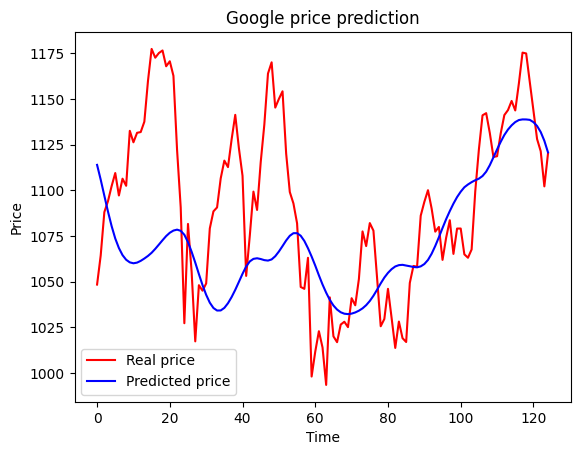

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the training dataset
dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.csv')
dataset_train.head()

# Extract the training set
training_set = dataset_train.iloc[:, 1: 2].values
print(training_set.shape)

# Visualize the data
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

# Scale the data
scaled = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaled.fit_transform(training_set)

# Prepare the training data
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100)

# Read the test dataset
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1: 2].values
print(real_stock_price.shape)

# Prepare the test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaled.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaled.inverse_transform(predicted_stock_price)

# Visualize the results
plt.plot(real_stock_price, color='red', label='Real price')
plt.plot(predicted_stock_price, color='blue', label='Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
